In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from PIL import ImageFilter
import os
import pandas as pd

In [2]:
def load_image(f):
    img = Image.open(f)
    return img

In [3]:
def plot_image(img, annotation=''):
    plt.imshow(np.asarray(img, dtype=np.int32))
    plt.title(annotation)
    plt.show()

In [4]:
main_dir = '../../datasets/GTSRB_data/Final_Training/Images'

damaged_signs = []
undamaged_signs = []

subfolders = [f.path for f in os.scandir(main_dir) if f.is_dir() ]    

subfolders

total_img = 0

for subfolder in subfolders:
    
    
    anno_directory = f'{subfolder}/GT-{subfolder[-5:]}.csv'
        
    annotations = pd.read_csv(anno_directory).set_index('Filename')
    
    print(annotations.loc[:, 'Damage'].value_counts())
    for image in os.listdir(subfolder):
        total_img += 1
        if image[-3:] == 'csv':
            continue

        image_dir = subfolder + '/' + image
        if annotations.loc[image, 'Damage'] == 1:
            image_dir = subfolder + '/' + image
            damaged_signs.append(image_dir)
        else:
            undamaged_signs.append(image_dir)




0    750
1     30
Name: Damage, dtype: int64
0    1170
1     300
Name: Damage, dtype: int64
0    390
Name: Damage, dtype: int64
0    150
1     60
Name: Damage, dtype: int64
0    1620
1     450
Name: Damage, dtype: int64
0    1440
Name: Damage, dtype: int64
1    150
0    150
Name: Damage, dtype: int64
0    420
Name: Damage, dtype: int64
0    2010
1     210
Name: Damage, dtype: int64
0    1410
Name: Damage, dtype: int64
0    210
Name: Damage, dtype: int64
0    390
1     60
Name: Damage, dtype: int64
0    150
1     90
Name: Damage, dtype: int64
0    1650
1     450
Name: Damage, dtype: int64
0    600
1     30
Name: Damage, dtype: int64
0    450
1     60
Name: Damage, dtype: int64
0    240
1     30
Name: Damage, dtype: int64
0    210
1    150
Name: Damage, dtype: int64
0    1440
1      60
Name: Damage, dtype: int64
0    360
1     30
Name: Damage, dtype: int64
0    690
1     90
Name: Damage, dtype: int64
0    2010
1     150
Name: Damage, dtype: int64
0    990
1    210
Name: Damage, dtype: in

In [5]:
total_img

39252

In [6]:
len(damaged_signs)

3720

/Users/david/miniconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: This function is deprecated. Please call randint(0, 3720 + 1) instead
  """Entry point for launching an IPython kernel.


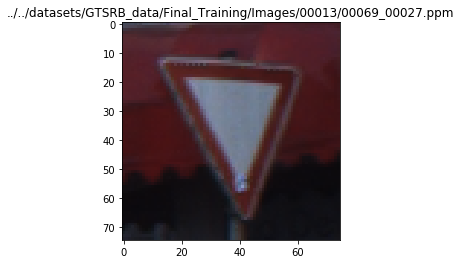

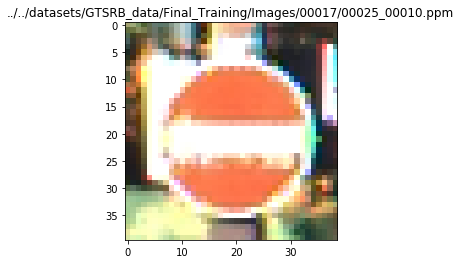

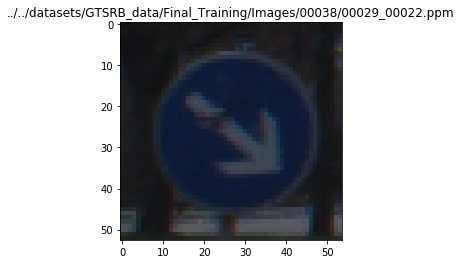

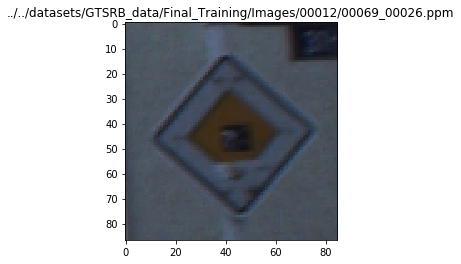

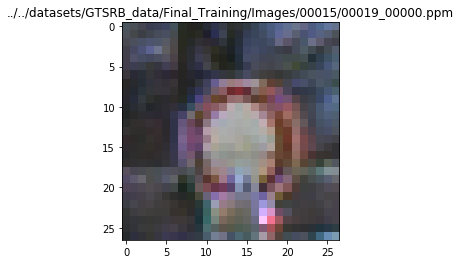

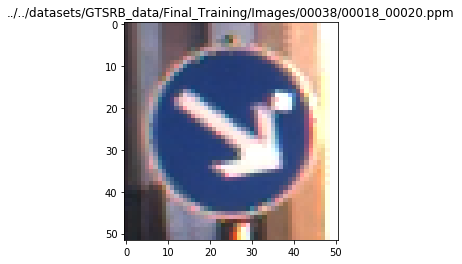

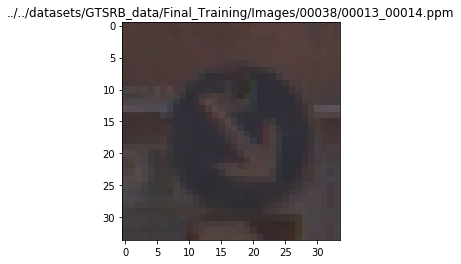

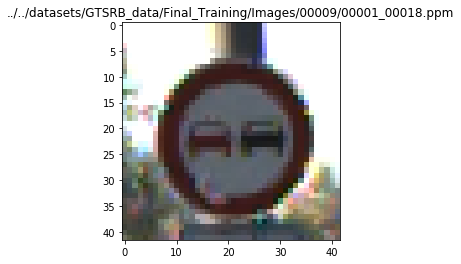

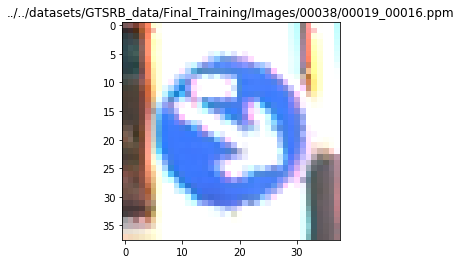

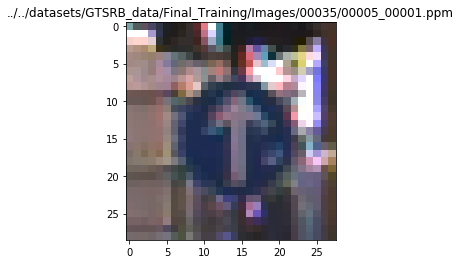

In [7]:
sample = np.random.random_integers(0, len(damaged_signs), size=10)

for s in sample:
    img = Image.open(damaged_signs[s])
    plot_image(img, annotation=damaged_signs[s])

In [8]:
traffic_sign = load_image('../../datasets/GTSRB_data/Final_Training/Images/00003/00000_00009.ppm')

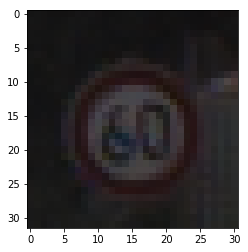

In [9]:
plot_image(traffic_sign)

In [10]:
w = np.random.randint(0.1, 0.5 * traffic_sign.size[0])
h = np.random.randint(0.1, 0.5 * traffic_sign.size[1])

In [11]:
import numpy as np

def PIL_random_crop(img, shape):
    w = shape[0]
    h = shape[1]
    
    
    x_loc = np.random.randint(0, max(img.size[0], w - img.size[0]))
    y_loc = np.random.randint(0, max(img.size[1], h - img.size[1]))
        
    crop = (x_loc, y_loc, x_loc + w, y_loc + h)
            
    img = img.crop(crop)
    return img

In [55]:
Image.fromarray((np.array(img) * 0.8).astype('uint8'))

In [12]:
stickers = os.listdir('./sticker/')

In [227]:
from PIL import ImageChops

def uses_transparency(filename):
    img = Image.open(filename)
    trans = img.info.get("transparency", None)
    if trans is not None:
        trans *= 3  # convert color number to palette table index
        palette = img.getpalette()
        imgs = []
        for bg in [0, 255]:   # map transparent color first to black, then white
            palette[trans:trans+3] = [bg] * 3
            img.putpalette(palette)
            imgs.append(img.convert("L"))
        return bool(ImageChops.difference(*imgs).getbbox())


In [229]:
import numpy
from PIL import ImageDraw

def create_circle(im):
    # read image as RGB and add alpha (transparency)
    im = im.convert('RGBA')
    
    # convert to numpy (for convenience)
    imArray = numpy.asarray(im)

#     create mask (zeros + circle with ones)
    center = (int(im.size[0] / 2), int(im.size[1]) / 2)
    radius = min(im.size) / 2
    mask = numpy.zeros((imArray.shape[0],imArray.shape[1]))
    for i in range(imArray.shape[0]):
        for j in range(imArray.shape[1]):
            if (i-center[0])**2 + (j-center[0])**2 < radius**2:
                mask[i,j] = 1

#     # create mask
#     polygon = [(3,3), (15,15), (7,7)]
#     maskIm = Image.new('L', (imArray.shape[1], imArray.shape[0]), 0)
#     ImageDraw.Draw(maskIm).polygon(polygon, outline=1, fill=1)
#     mask = numpy.array(maskIm)

    # assemble new image (uint8: 0-255)
    newImArray = numpy.empty(imArray.shape,dtype='uint8')

    # colors (three first columns, RGB)
    newImArray[:,:,:3] = imArray[:,:,:3]
    
    print(mask.shape)

    # transparency (4th column)
    
    
    newImArray[:,:,3] = mask*255          

    # back to Image from numpy
    newIm = Image.fromarray(newImArray, "RGBA")
    return newIm

In [236]:
def normalize_img(img, channel_means):
    img_channel_means = np.array(img)[:, :, :3].mean(axis=(0,1))    
    
    ratios = channel_means / img_channel_means
    
    im = np.array(img)
    
    ratios[ratios > 1.25] = 1.25
#     ratios[ratios < 0.75] = 0.75
    
    for i in range(len(ratios)):
        
        im[:, :, i] = im[:, :, i] * ratios[i]
    
    normalized = im.astype('uint8')  
    normalized = Image.fromarray(normalized).convert('RGBA')
    return normalized


In [295]:
import random

def add_graffiti(img):
    
            
    channel_means = np.array(img)[:, :, :3].mean(axis=(0,1))    
    
    
    sticker_dir = './sticker/'
    stickers = [sticker for sticker in os.listdir(sticker_dir) if sticker[-3:] == 'gif']
    
    
    angle = np.random.randint(0, 360)

    sticker = load_image(sticker_dir + random.choice(stickers)).rotate(angle).convert('RGBA')
    
    plot_image(sticker)
#     sticker = normalize_img(sticker, channel_means)
    
        
    s = np.random.randint(0.1*img.size[0], 0.3*img.size[0])

    sticker = sticker.resize((s, s))
            
    pixels = [pix for pix in sticker.getdata()]
    sticker = create_circle(sticker)
        
    alpha = max(32, 64 + int(channel_means.mean()) - np.product(sticker.size))
        
    for i in range(len(pixels)):
        if pixels[i][-1] != 0:
            
            pixels[i] = (*pixels[i][:3], alpha)
    
    sticker.putdata(pixels)
    
    plot_image(sticker)
            
    x = np.random.randint(img.size[0] / 3, img.size[0] / 3 * 2)
    y = np.random.randint(img.size[1] / 3, img.size[1] / 3 * 2)
        
    img.paste(sticker, (x, y), sticker)
        
    return img

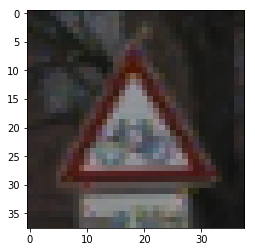

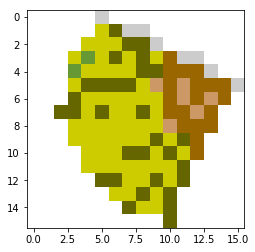

(6, 6)


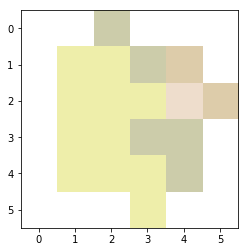

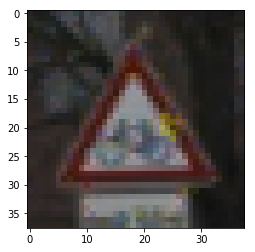

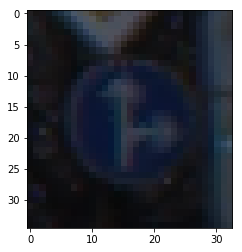

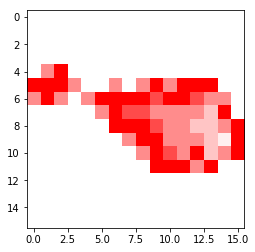

(3, 3)


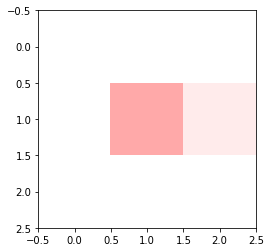

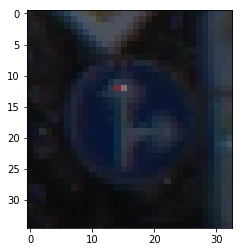

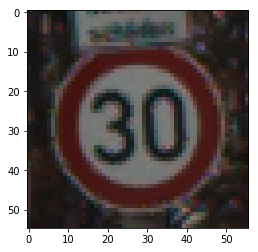

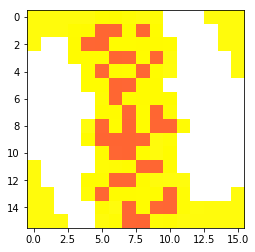

(5, 5)


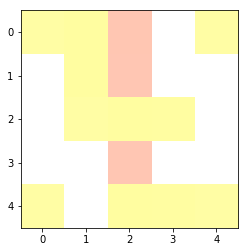

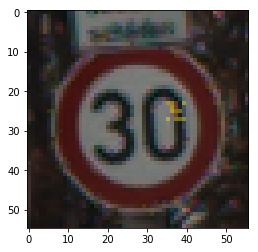

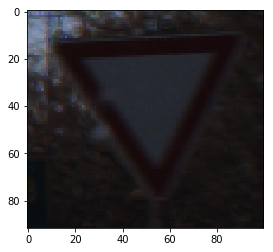

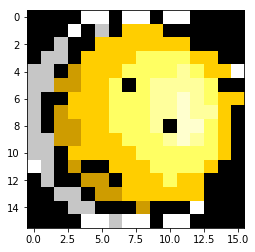

(14, 14)


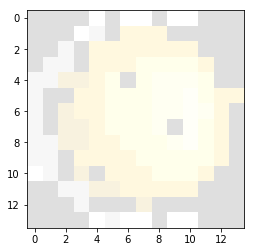

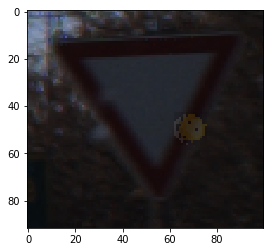

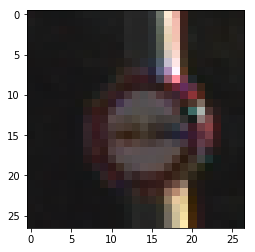

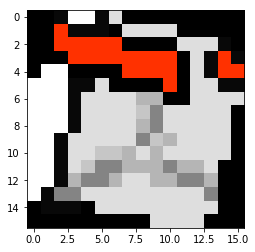

(6, 6)


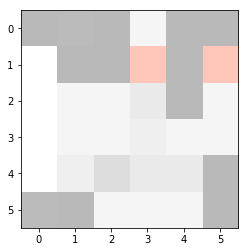

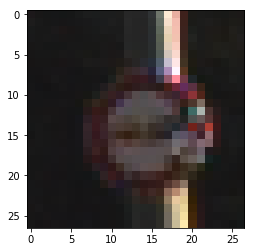

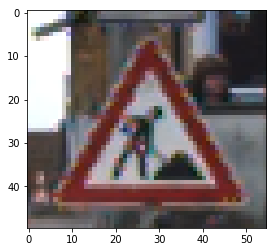

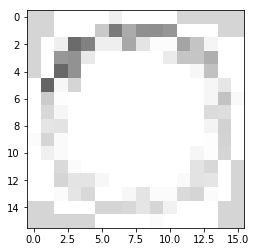

(8, 8)


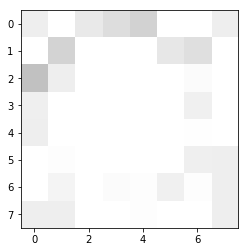

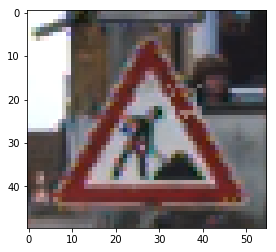

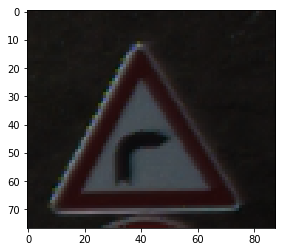

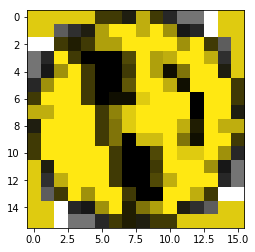

(12, 12)


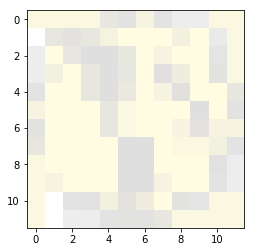

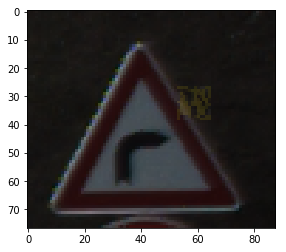

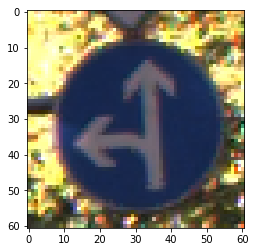

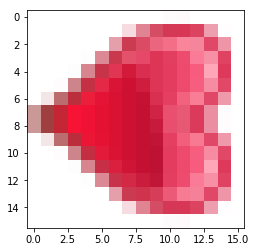

(6, 6)


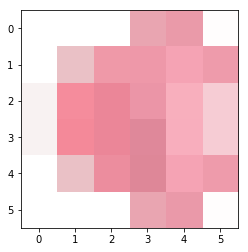

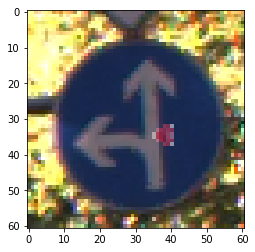

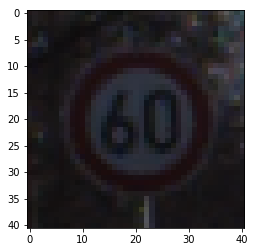

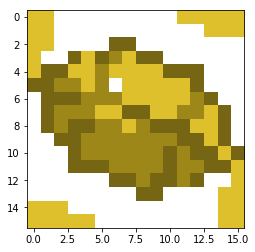

(9, 9)


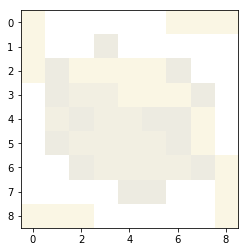

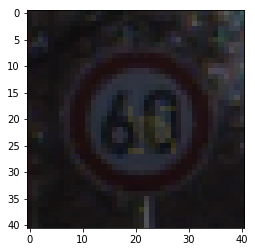

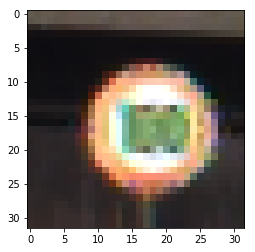

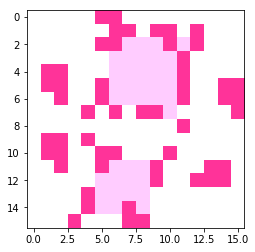

(6, 6)


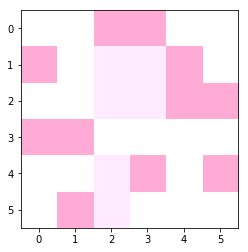

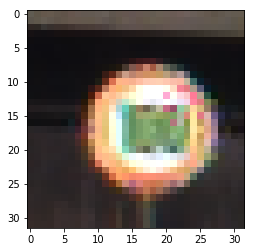

In [296]:
for _ in range(10):
    traffic_sign_path = str(random.choice(undamaged_signs))
    traffic_sign = load_image(traffic_sign_path)
    plot_image(traffic_sign)
    plot_image(add_graffiti(traffic_sign))